In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

In [0]:
from scipy import stats

[DataCamp Link](https://www.datacamp.com/courses/customer-analytics-ab-testing-in-python)

**Course Description**
The most successful companies today are the ones that know their customers so well that they can anticipate their needs. Customer analytics and in particular A/B Testing are crucial parts of leveraging quantitative know-how to help make business decisions that generate value. This course covers the ins and outs of how to use Python to analyze customer behavior and business trends as well as how to create, run, and analyze A/B tests to make proactive, data-driven business decisions.

# 1. Key Performance Indicators: Measuring Business Success

This chapter provides a brief introduction to the content that will be covered throughout the course before transitioning into a discussion of Key Performance Indicators or KPIs. You'll learn how to identify and define meaningful KPIs through a combination of critical thinking and leveraging Python tools. These techniques are all presented in a highly practical and generalizable way. Ultimately these topics serve as the core foundation for the A/B testing discussion that follows.

###Identifying and understanding KPIs


In [0]:
# Import pandas 
import pandas as pd 

# Load the customer_data
customer_data = pd.read_csv('customer_data.csv')

# Load the app_purchases
app_purchases = pd.read_csv('inapp_purchases.csv')

# Print the columns of customer data
print(customer_data.columns)

# Print the columns of app purchases
print(app_purchases.columns)

Index(['uid', 'reg_date', 'device', 'gender', 'country', 'age'], dtype='object')
Index(['date', 'uid', 'sku', 'price'], dtype='object')


In [0]:
# sanity check - only a subset
customer_data.shape

(1100, 6)

####Merging on different sets of fields

- Merge customer_data with app_purchases, combining on the 'uid' column.

In [0]:
# Merge on the 'uid' field
uid_combined_data = app_purchases.merge(customer_data, on=['uid'], how='inner')

# Examine the results 
print(uid_combined_data.head())
print(len(uid_combined_data))

Empty DataFrame
Columns: [date, uid, sku, price, reg_date, device, gender, country, age]
Index: []
0


- To look at purchases that happened on the date of registration, merge `customer_data` to `app_purchases` on `'uid'` and `'date'`.

In [0]:
# match dataset
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%dT%H:%M:%SZ')

df = pd.read_csv('customer_data.csv', parse_dates=['reg_date'], date_parser=dateparse)

In [0]:
df.head()

,uid,reg_date,device,gender,country,age
0,52774929,2018-03-07,and,F,FRA,27
1,40143397,2016-07-02,and,F,DEU,56
2,89856430,2017-06-05,and,M,TUR,31
3,76188504,2016-09-24,iOS,M,BRA,54
4,76493748,2017-06-07,iOS,M,BRA,24


In [0]:
df.dtypes

uid                  int64
reg_date    datetime64[ns]
device              object
gender              object
country             object
age                  int64
dtype: object

In [0]:
# match dataset
customer_data = df.rename(columns={"reg_date": "date"})
customer_data.head()

,uid,date,device,gender,country,age
0,52774929,2018-03-07,and,F,FRA,27
1,40143397,2016-07-02,and,F,DEU,56
2,89856430,2017-06-05,and,M,TUR,31
3,76188504,2016-09-24,iOS,M,BRA,54
4,76493748,2017-06-07,iOS,M,BRA,24


In [0]:
import datetime

In [0]:
# convert datetime back to object
customer_data.date = customer_data.date.apply(lambda x: x.strftime('%Y-%m-%d'))

In [0]:
customer_data.dtypes

uid         int64
date       object
device     object
gender     object
country    object
age         int64
dtype: object

In [0]:
app_purchases.head()

,date,uid,sku,price
0,2017-07-10,41195147,sku_three_499,499
1,2017-07-15,41195147,sku_three_499,499
2,2017-11-12,41195147,sku_four_599,599
3,2017-09-26,91591874,sku_two_299,299
4,2017-12-01,91591874,sku_four_599,599


In [0]:
# Merge on the 'uid' and 'date' field
uid_date_combined_data = app_purchases.merge(customer_data, on=['uid', 'date'], how='inner')

# Examine the results 
print(uid_date_combined_data.head())
print(len(uid_date_combined_data))

Empty DataFrame
Columns: [date, uid, sku, price, device, gender, country, age]
Index: []
0


###Exploratory analysis of KPIs


#### Practicing aggregations

In [0]:
# dataset not available

1. Find the 'mean' purchase price paid across our dataset. Then examine the output before moving on.

In [0]:
# Calculate the mean purchase price 
purchase_price_mean = purchase_data.price.agg('mean')

# Examine the output 
print(purchase_price_mean)

2. Now, use the .agg() method to find the 'mean' and 'median' prices together.

In [0]:
# Calculate the mean and median purchase price 
purchase_price_summary = purchase_data.price.agg(['mean', 'median'])

# Examine the output 
print(purchase_price_summary)

3. Now, find the 'mean' and 'median' for both the 'price' paid and the 'age' of purchaser.

In [0]:
# Calculate the mean and median of price and age
purchase_summary = purchase_data.agg({'price': ['mean', 'median'], 'age': ['mean', 'median']})

# Examine the output 
print(purchase_summary)

####Grouping & aggregating

- Group the purchase_data DataFrame by 'device' and 'gender' in that order.
- Aggregate grouped_purchase_data, finding the 'mean', 'median', and the standard deviation ('std') of the purchase price, in that order, across these groups.
- Examine the results. Does the mean differ drastically from the median? How much variability is in each group?

In [0]:
# Group the data 
grouped_purchase_data = purchase_data.groupby(by=['device', 'gender'])

# Aggregate the data
purchase_summary = grouped_purchase_data.agg({'price': ['mean', 'median', 'std']})

# Examine the results
print(purchase_summary)

###Calculating KPIs - a practical example


1. Subtract `timedelta(days=28)` from `current_date` to find the last date that we will count purchases from. The `current_date` variable has already been defined.

In [0]:
# Compute max_purchase_date
max_purchase_date = current_date - timedelta(days=28)

2. Filter out all users in `purchase_data` who registered in the last 28 days. That is, users whose `purchase_data.reg_date` is less than `max_purchase_date`.

In [0]:
# Filter to only include users who registered before our max date
purchase_data_filt = purchase_data[purchase_data.reg_date < max_purchase_date]

3. Filter this dataset to only include purchases that occurred on a date within the first 28 days. Recall that the `date` of purchase is stored in the `date` column.

In [0]:
# Filter to contain only purchases within the first 28 days of registration
purchase_data_filt = purchase_data_filt[(purchase_data_filt.date <=
                                         purchase_data_filt.reg_date + 
                                         timedelta(days=28))]

4. Find the mean of the `price` paid on purchases in `purchase_data_filt`.

In [0]:
# Output the mean price paid per purchase
print(purchase_data_filt.price.mean())

####Average purchase price by cohort

Use `np.where` to create an array `month1` containing:

- the price of the purchase purchase, if

 - the user registration `.reg_date` occurred at most 28 days ago (i.e. before `max_reg_date`), and

 - the date of purchase `.date` occurred within 28 days of registration date `.reg_date`;

- `NaN`, otherwise.

In [0]:
# Set the max registration date to be one month before today
max_reg_date = current_date - timedelta(days=28)

# Find the month 1 values
month1 = np.where((purchase_data.reg_date < max_reg_date) &
                 (purchase_data.date < purchase_data.reg_date + timedelta(days=28)),
                  purchase_data.price, 
                  np.NaN)
                 
# Update the value in the DataFrame
purchase_data['month1'] = month1

- Now, group `purchase_data` by `gender` and then `device` using the `.groupby()` method.

In [0]:
# Group the data by gender and device 
purchase_data_upd = purchase_data.groupby(by=['gender', 'device'], as_index=False)

- Aggregate the `"mean"` and `"median"` of both `'month1'` and`'price'` using the `.agg()` method in the listed order of aggregations and fields.

In [0]:
# Aggregate the month1 and price data 
purchase_summary = purchase_data_upd.agg(
                        {'month1': ['mean', 'median'],
                        'price': ['mean', 'median']})

# Examine the results 
print(purchase_summary)

# 2. Exploring and Visualizing Customer Behavior

This chapter teaches you how to visualize, manipulate, and explore KPIs as they change over time. Through a variety of examples, you'll learn how to work with datetime objects to calculate metrics per unit time. Then we move to the techniques for how to graph different segments of data, and apply various smoothing functions to reveal hidden trends. Finally we walk through a complete example of how to pinpoint issues through exploratory data analysis of customer data. Throughout this chapter various functions are introduced and explained in a highly generalizable way.

###Working with time series data in pandas


####Parsing dates

- Provide the correct format for the following date:

`Saturday January 27, 2017`

In [0]:
date_data_one = ['Saturday January 27, 2017', 'Saturday December 2, 2017']

In [0]:
# Provide the correct format for the date
date_data_one = pd.to_datetime(date_data_one, format="%A %B %d, %Y")
print(date_data_one)

DatetimeIndex(['2017-01-27', '2017-12-02'], dtype='datetime64[ns]', freq=None)


- Provide the correct format for the following date:

`2017-08-01`

In [0]:
# Provide the correct format for the date
date_data_two = pd.to_datetime(date_data_two, format="%Y-%m-%d")
print(date_data_two)

- Provide the correct format for the following date.

`08/17/1978`

In [0]:
# Provide the correct format for the date
date_data_three = pd.to_datetime(date_data_three, format="%m/%d/%Y")
print(date_data_three)

- Provide the correct format for the following date:

`2016 March 01 01:56`

In [0]:
# Provide the correct format for the date
date_data_four = pd.to_datetime(date_data_four, format="%Y %B %d %H:%M")
print(date_data_four)

###Creating time series graphs with matplotlib


In [0]:
# Group the data and aggregate first_week_purchases
user_purchases = user_purchases.groupby(by=['reg_date', 'uid']).agg({'first_week_purchases': ['sum']})

# Reset the indexes
user_purchases.columns = user_purchases.columns.droplevel(level=1)
user_purchases.reset_index(inplace=True)

# Find the average number of purchases per day by first-week users
user_purchases = user_purchases.groupby(by=['reg_date']).agg({'first_week_purchases': ['mean']})
user_purchases.columns = user_purchases.columns.droplevel(level=1)
user_purchases.reset_index(inplace=True)

# Plot the results 
user_purchases.plot(x='reg_date', y='first_week_purchases')
plt.show()

####Pivoting our data

1. Pivot the `user_purchases_country` table such that we have our `first_week_purchases` as our values, the `country` as the column, and our `reg_date` as the row.

In [0]:
# Pivot the data 
country_pivot = pd.pivot_table(user_purchases_country, values=['first_week_purchases'], columns=['country'], index=['reg_date'])
print(country_pivot.head())

2. Now lets look at our device data. Let us pivot the `user_purchases_device` table such that we have our `first_week_purchases` as our values, the `device` as the column, and our `reg_date` as the row.

In [0]:
# Pivot the data
device_pivot = pd.pivot_table(user_purchases_device, values=['first_week_purchases'], columns=['device'], index=['reg_date'])
print(device_pivot.head())

####Examining the different cohorts

1. Plot the average first week purchases for each country by registration date ('reg_date'). There are 6 countries here: 'USA', 'CAN', 'FRA', 'BRA', 'TUR', and 'DEU'. Plot them in the order shown.

In [0]:
# Plot the average first week purchases for each country by registration date
country_pivot.plot(x='reg_date', y=['USA', 'CAN', 'FRA', 'BRA', 'TUR', 'DEU'])
plt.show()

2. Now, plot the average first week purchases for each device (`'and'` and `'iOS'`) by registration date (`'reg_date'`). Plot the devices in the order listed.

In [0]:
# Plot the average first week purchases for each device by registration date
device_pivot.plot(x='reg_date', y=['and', 'iOS'])
plt.show()

###Understanding and visualizing trends


In [0]:
# match dataset
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%dT%H:%M:%SZ')
daily_revenue = pd.read_csv('daily_revenue.csv', index_col=0, parse_dates=['date'], date_parser=dateparse)
daily_revenue.head()

,gender,device,revenue,date,country
index,,,,,
1,male,ios,186557.0,2013-09-20,USA
2,male,ios,177217.0,2013-09-21,USA
3,male,ios,177197.0,2013-09-22,USA
4,male,ios,157193.0,2013-09-23,USA
5,male,ios,165592.0,2013-09-24,USA


####Seasonality and moving averages


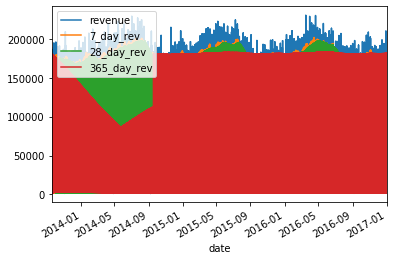

In [0]:
# Compute 7_day_rev
daily_revenue['7_day_rev'] = daily_revenue.revenue.rolling(window=7,center=False).mean()
    
# Compute 28_day_rev
daily_revenue['28_day_rev'] = daily_revenue.revenue.rolling(window=28,center=False).mean()
    
# Compute 365_day_rev
daily_revenue['365_day_rev'] = daily_revenue.revenue.rolling(window=365,center=False).mean()
    
# Plot date, and revenue, along with the 3 rolling functions (in order)    
daily_revenue.plot(x='date', y=['revenue', '7_day_rev', '28_day_rev', '365_day_rev', ])
plt.show()

####Exponential rolling average & over/under smoothing

Using the `.ewm()` method, calculate the exponential rolling average

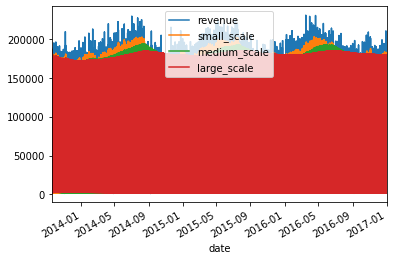

In [0]:
# Calculate 'small_scale'
daily_revenue['small_scale'] = daily_revenue.revenue.ewm(span=10).mean()

# Calculate 'medium_scale'
daily_revenue['medium_scale'] = daily_revenue.revenue.ewm(span=100).mean()

# Calcualte 'large_scale'
daily_revenue['large_scale'] = daily_revenue.revenue.ewm(span=500).mean()

# Plot the date, and the raw data plus the calculated averages
daily_revenue.plot(x = 'date', y =['revenue','small_scale', 'medium_scale', 'large_scale'])
plt.show()

###Events and releases


In [0]:
# dataset not available

In [0]:
# Pivot user_revenue
pivoted_data = pd.pivot_table(user_revenue, values='revenue', columns=['device', 'gender'], index='month')
pivoted_data = pivoted_data[1:(len(pivoted_data) -1 )]

# Create and show the plot
pivoted_data.plot()
plt.show()

# 3. The Design and Application of A/B Testing

In this chapter you will dive fully into A/B testing. You will learn the mathematics and knowledge needed to design and successfully plan an A/B test from determining an experimental unit to finding how large a sample size is needed. Accompanying this will be an introduction to the functions and code needed to calculate the various quantities associated with a statistical test of this type.

###Introduction to A/B testing

####Experimental units: Revenue per user day


In [0]:
# dateset not available

- Extract the 'day' value from the `date` timestamp as you saw in the video: Using `.date.dt.floor('d')`.
- To make the calculations easier, replace the `NaN` purchase_data.price values with 0 by using the `np.where()` method.
- Finally, find the mean amount paid per user-day among paywall viewers. To do this, you need to first aggregate the data by `'uid'` and `'date'`, which has been done for you.

In [0]:
# Round our timestamp to 'day'
purchase_data.date = purchase_data.date.dt.floor('d')

# Replace the NaN price values with 0 
purchase_data.price = np.where(np.isnan(purchase_data.price), 0, purchase_data.price)

# Aggregate the data by 'uid' & 'date'
purchase_data_agg = purchase_data.groupby(by=['uid', 'date'], as_index=False)
revenue_user_day = purchase_data_agg.price.sum()

# Calculate the final average
revenue_user_day = revenue_user_day.price.mean()
print(revenue_user_day)

### Preparing to run an A/B test


####Conversion rate sensitivities

- Merge the `paywall_views` with `demographics_data` tables using an `'inner'` join. This will limit the result to only include users who appear in both and will remove everyone who did not view a paywall, which is what we want in this scenario.
- Group `purchase_data` by `'date'`. The result of this is then aggregated for you by summing over the `purchase` field to find the total number of purchases and counting over it to find the total number of paywall views.
- Average each of the resulting `sum` and `count` fields to find the average number of purchases and paywall views per day.
- The results reflect a sample of 0.1% of our overall population for ease of use. Multiply each of `daily_purchases` and `daily_paywall_views` by `1000` so our result reflects the magnitude change if we had been observing the entire population.

In [0]:
# Merge the datasets and calculate the per day metrics 
purchase_data = demographics_data.merge(paywall_views, how='inner', on=['uid'])
purchase_data.date = purchase_data.date.dt.floor('d')

# Group and aggregate our combined data set 
daily_purchase_data = purchase_data.groupby(by=['date'], as_index=False)
daily_purchase_data = daily_purchase_data.agg({'purchase': ['sum', 'count']})

# Find the mean of each field and then multiply by 1000 to scale the result
daily_purchases = daily_purchase_data.purchase['sum'].mean()
daily_paywall_views = daily_purchase_data.purchase['count'].mean()
daily_purchases = daily_purchases * 1000
daily_paywall_views = daily_paywall_views * 1000

print(daily_purchases)
print(daily_paywall_views)

####Sensitivity

In [0]:
conversion_rate = 0.03468
daily_paywall_views = 91731.8
daily_purchases = 3181.8

- Using the proposed `small_sensitivity` of `0.1`, find the lift in conversion rate and purchasers that would result by applying this sensitivity. Are these resulting values reasonable?

In [0]:
small_sensitivity = 0.1 

# Find the conversion rate when increased by the percentage of the sensitivity above
small_conversion_rate = conversion_rate * (1 + small_sensitivity) 

# Apply the new conversion rate to find how many more users per day that translates to
small_purchasers = daily_paywall_views * small_conversion_rate

# Subtract the initial daily_purcahsers number from this new value to see the lift
purchaser_lift = small_purchasers - daily_purchases

print(small_conversion_rate)
print(small_purchasers)
print(purchaser_lift)

- Now repeating the steps from before, find the lift in conversion rate and purchasers using the `medium_sensitivity`. In this exercise you are additionally asked to complete the step to find the increase in purchasers based on this new conversion rate.

In [0]:
medium_sensitivity = 0.2

# Find the conversion rate lift with the sensitivity above
medium_conversion_rate = conversion_rate * (1 + medium_sensitivity)

# Find how many more users per day that translates to
medium_purchasers = daily_paywall_views * medium_conversion_rate

# Subtract the initial daily_purcahsers number from this new value to see the lift
purchaser_lift = medium_purchasers - daily_purchases

print(medium_conversion_rate)
print(medium_purchasers)
print(purchaser_lift)

- Finally repeat the steps from before to find the increase in conversion rate and purchasers when using the very large sensitivity of `0.5`. The steps required are the same as the previous exercise. How do the results compare those returned in the previous two exercises?

In [0]:
large_sensitivity = 0.5

# Find the conversion rate lift with the sensitivity above 
large_conversion_rate = conversion_rate * (1 + large_sensitivity)

# Find how many more users per day that translates to
large_purchasers = daily_paywall_views * large_conversion_rate

# Subtract the initial daily_purcahsers number from this new value to see the lift
purchaser_lift = large_purchasers - daily_purchases

print(large_conversion_rate)
print(large_purchasers)
print(purchaser_lift)

####Standard error

Previously we observed how to calculate the standard deviation using the `.std()` method. In this exercise, you will explore how to calculate standard deviation for a conversion rate, which requires a slightly different procedure. 

- Find the number of paywall views in the dataset using `.count()`. Store this in `n`.
- Calculate a quantity we will call `v` by finding the `conversion_rate` times the rate of not converting.
- Now find our variance, `var`, by dividing `v` by `n`. This is the variance of our conversion rate estimate.
- Finally the square root of `var` has been taken and stored as the variable `se` for you. This is the standard error of our estimate.

In [0]:
# Find the n & v quantities
n = purchase_data.purchase.count()

# Calculate the quantity "v"
v = conversion_rate * (1 - conversion_rate) 

# Calculate the variance and standard error of the estimate
var = v / n 
se = var**0.5

print(var)
print(se)

###Calculating sample size


####Exploring the power calculation

As discussed, power is the probability of rejecting the null hypothesis when the alternative hypothesis is true. Here you will explore some properties of the power function and see how it relates to sample size among other parameters. 

The `get_power()` function has been included and takes the following arguments in the listed order n for sample size, `p1` as the baseline value, `p2` as the value with lift included, and `cl` as the confidence level.

In [0]:
def get_power(n, p1, p2, cl):
    alpha = 1 - cl
    
    qu = stats.norm.ppf(1 - alpha/2)
    
    diff = abs(p2 - p1)
    bp = (p1 + p2) / 2
    
    v1 = p1 * (1 - p1)
    v2 = p2 * (1 - p2)
    
    bv = bp * (1 - bp)
    
    power_part_one = stats.norm.cdf((n**0.5 * diff - qu * (2 * bv)**0.5)/ (v1 + v2)**0.5)
    power_part_two = 1 - stats.norm.cdf((n**0.5 * diff + qu * (2 * bv)**0.5)/ (v1 + v2)**0.5)
    
    power = power_part_one + power_part_two
    return(power)

- Calculate the power using n = 1000 and n = 2000 in that order, along with the pre-loaded parameters, `p1`, `p2`, and `cl`.

- Using the variable n1 for the sample size, find the power with a confidence level of `cl` = `0.8` and `cl` = `0.95` in that order.

In [0]:
p1 = .1
p2 = .12
cl = .95
n1 = 1000

In [10]:
# Look at the impact of sample size increase on power
n_param_one = get_power(n=1000, p1=p1, p2=p2, cl=cl)
n_param_two = get_power(n=2000, p1=p1, p2=p2, cl=cl)

# Look at the impact of confidence level increase on power
alpha_param_one = get_power(n=n1, p1=p1, p2=p2, cl=0.8)
alpha_param_two = get_power(n=n1, p1=p1, p2=p2, cl=0.95)
    
# Compare the ratios
print(n_param_two / n_param_one)
print(alpha_param_one / alpha_param_two)

1.7596440001351992
1.8857367092232278


####Calculating the sample size
You're now going to utilize the sample size function to determine how many users you need for the test and control groups under various circumstances.

In [0]:
def get_sample_size(power, p1, p2, cl, max_n = 1000000):
    n = 1 
    while n <= max_n:
        tmp_power = get_power(n, p1, p2, cl)
        
        if tmp_power >= power: 
            return n 
        else: 
            n = n + 100
            
    return "Increase Max N Value"

- Calculate the baseline `conversion_rate` per paywall view by dividing the total amount spent across all `purchase_data.purchase` values by the count of `purchase_data.purchase` values in the dataset.

In [0]:
# Merge the demographics and purchase data to only include paywall views
purchase_data = demographics_data.merge(paywall_views, how='inner', on=['uid'])
  
# Find the conversion rate
conversion_rate = (sum(purchase_data.purchase) / purchase_data.purchase.count())
            
print(conversion_rate)

Using the `conversion_rate` value you found, calculate `p2`, the baseline increased by the percent lift listed.

- Calculate the sample size needed using the parameters provided in the code comments. Remember the order of the arguments for `get_sample_size` is `power`, `baseline conversion rate`, `lifted conversion rate` and `confidence level`.

In [0]:
# Merge the demographics and purchase data to only include paywall views
purchase_data = demographics_data.merge(paywall_views, how='inner', on=['uid'])
                            
# Find the conversion rate
conversion_rate = (sum(purchase_data.purchase) / purchase_data.purchase.count())
            
# Desired Power: 0.8
# CL: 0.90
# Percent Lift: 0.1
p2 = conversion_rate * (1 + 0.1)
sample_size = get_sample_size(0.8, conversion_rate, p2, 0.90)
print(sample_size)

Repeat the steps in the previous exercise only now with the new power parameter provided. How does increasing our desired power impact the outputed sample size?

In [0]:
# Merge the demographics and purchase data to only include paywall views
purchase_data = demographics_data.merge(paywall_views, how='inner', on=['uid'])
                            
# Find the conversion rate
conversion_rate = (sum(purchase_data.purchase) / purchase_data.purchase.count())

# Desired Power: 0.95
# CL: 0.90
# Percent Lift: 0.1
p2 = conversion_rate * (1 + 0.1)
sample_size = get_sample_size(0.95, conversion_rate, p2, 0.90)
print(sample_size)

# 4. Analyzing A/B Testing Results
 
 After running an A/B test, you must analyze the data and then effectively communicate the results. This chapter begins by interleaving the theory of statistical significance and confidence intervals with the tools you need to calculate them yourself from the data. Next we discuss how to effectively visualize and communicate these results. This chapter is the culmination of all the knowledge built over the entire course.

As discussed we created our test and control groups by assigning unique users to each. Confirm the size the groups are similar by grouping by `group` and aggregating to find the number of unique `uid` in each with the `pd.Series.nunique()` method.

In [0]:
# Compute and print the results
results = ab_test_results.groupby('group').agg({'uid': pd.Series.nunique}) 
print(results)

Now convert this number to the percentage of overall users in each group. This will help in presenting the result and speaking about it precisely. To do this, use the `len()` function and `unique()` method to find the number of unique uid in `ab_test_results` and to then divide by this result.

In [0]:
# Find the unique users in each group 
results = ab_test_results.groupby('group').agg({'uid': pd.Series.nunique}) 

# Find the overall number of unique users using "len" and "unique"
unique_users = len(ab_test_results.uid.unique())

# Find the percentage in each group
results = results / unique_users * 100
print(results)

Finally, additionally group by `'device'` and `'gender'` when finding the number of users in each group. This will let us compute our percentage calculation broken out by `'device'` and `'gender'` to confirm our result is truly random across cohorts.

In [0]:
# Find the unique users in each group 
results = ab_test_results.groupby(by=['group', 'device', 'gender']).agg({'uid': pd.Series.nunique}) 

# Find the overall number of unique users using "len" and "unique"
unique_users = len(ab_test_results.uid.unique())

# Find the percentage in each group
results = results / unique_users * 100
print(results)

####Thinking critically about p-values

The p-value is the probability of observing a value as or more extreme than the one observed under the Null Hypothesis.

###Understanding statistical significance


In [0]:
from scipy import stats

In [0]:
def get_pvalue(con_conv, test_conv,con_size,  test_size,):  
    lift =  - abs(test_conv - con_conv)
    
    scale_one = con_conv * (1 - con_conv) * (1 / con_size)
    scale_two = test_conv * (1 - test_conv) * (1 / test_size)
    scale_val = (scale_one + scale_two)**0.5

    p_value = 2 * stats.norm.cdf(lift, loc = 0, scale = scale_val )

    return p_value

- Find the p-value with initial conversion rate of 0.1, test conversion rate of 0.17, and 1000 observations in each group.

In [0]:
# Get the p-value
p_value = get_pvalue(con_conv=0.1, test_conv=0.17, con_size=1000, test_size=1000)
print(p_value)

4.131297741047306e-06


- Find the p-value with control conversion of `0.1`, test conversion of `0.15`, and `100` observations in each group.

In [0]:
# Get the p-value
p_value = get_pvalue(con_conv=0.1, test_conv=0.15, con_size=100, test_size=100)
print(p_value)

0.28366948940702086


- Now find the p-value with control conversion of `0.48`, test conversion of `0.50`, and `1000` observations in each group.

In [0]:
p_value = get_pvalue(con_conv=0.48, test_conv=0.50, con_size=1000, test_size=1000)
print(p_value)

0.370901935824383


####Checking for statistical significance


Find the p-value of our experiment using the loaded variables `cont_conv, test_conv, cont_size, test_size` calculated from our data. Then determine if our result is statistically significant by running the second section of code.

In [0]:
cont_conv = 0.090965
test_conv = 0.102005
test_size = 56350
cont_size = 58583

In [0]:
# Compute the p-value
p_value = get_pvalue(cont_conv, test_conv, cont_size, test_size)
print(p_value)

# Check for statistical significance
if p_value >= 0.05:
    print("Not Significant")
else:
    print("Significant Result")

2.3743974969828663e-10
Significant Result


####Understanding confidence intervals


In [0]:
import scipy.stats as sci

In [0]:
def get_ci(value, cl, sd):
  loc = sci.norm.ppf(1 - cl/2)
  rng_val = sci.norm.cdf(loc - value/sd)

  lwr_bnd = value - rng_val
  upr_bnd = value + rng_val 
  
  return_val = (lwr_bnd, upr_bnd)
  return(return_val)

1. Find the confidence interval with a value of 1, a confidence level of 0.975 and a standard deviation of 0.5.

In [0]:
# Compute and print the confidence interval
confidence_interval  = get_ci(1, 0.975, 0.5)
print(confidence_interval)

(0.9755040421682947, 1.0244959578317054)


2. Repeat the calculation, updating the confidence level to 0.95 and the standard deviation to 2. Leave the value as 1

In [0]:
# Compute and print the confidence interval
confidence_interval  = get_ci(1, 0.95, 2)
print(confidence_interval)

(0.6690506448818785, 1.3309493551181215)


3. Finally, update your code such that the standard deviation is 0.001 while leaving the confidence level and value the same as the previous exercise part. 

Compare the three confidence intervals outputted. How do they seem to relate to the parameters used?

In [0]:
# Compute and print the confidence interval
confidence_interval = get_ci(1, 0.95, 0.001)
print(confidence_interval)

(1.0, 1.0)


####Calculating confidence intervals


In [0]:
cont_conv = 0.090965
test_conv = 0.102005
test_size = 56350
cont_size = 58583

- Calculate the mean of the distribution of our lift by subtracting `cont_conv` from `test_conv`.
- Calculate the variance of our lift distribution by completing the calculation. You must complete the control portion of the variance.
- Find the standard deviation of our lift distribution by taking the square root of the `lift_variance`.
- Find the confidence bounds for our A/B test with a value equal to our `lift_mean`, a 0.95 confidence level, and our calculated `lift_sd`. Pass the arguments in that order.

In [0]:
# Calculate the mean of our lift distribution 
lift_mean = test_conv - cont_conv

# Calculate variance and standard deviation 
lift_variance = (1 - test_conv) * test_conv /test_size + (1 - cont_conv) * cont_conv / cont_size
lift_sd = lift_variance**0.5

# Find the confidence intervals with cl = 0.95
confidence_interval = get_ci(lift_mean, 0.95, lift_sd)
print(confidence_interval)

(0.011039999822042502, 0.011040000177957487)


####Interpreting your test results


####Plotting the distribution

In this exercise, you will visualize the test and control conversion rates as distributions.

- Using the calculated `control_sd` and `test_sd` create the range of x values to plot over. It should be 3 standard deviations in either direction from the `cont_conv` and `test_conv` respectively.
- Plot the Normal pdf of the test and control groups by specifying the conversion rate as the mean and the standard deviation in that order in `mlab.normpdf()`

In [0]:
import matplotlib.mlab as mlab

In [0]:
cont_var = 1.411507925080655e-06
test_var = 1.6255542142857143e-06

In [0]:
# Compute the standard deviations
control_sd = cont_var**0.5
test_sd = test_var**0.5

# Create the range of x values 
control_line = np.linspace(cont_conv - 3 * control_sd, cont_conv + 3 * control_sd, 100)
test_line = np.linspace(test_conv - 3 * test_sd ,test_conv +  3 * test_sd, 100)

# Plot the distribution     
plt.plot(control_line, mlab.normpdf(control_line, cont_conv, control_sd))
plt.plot(test_line, mlab.normpdf(test_line, test_conv, test_sd))
plt.show()

AttributeError: ignored

In [0]:
# mlab.normpdf removed

AttributeError: ignored

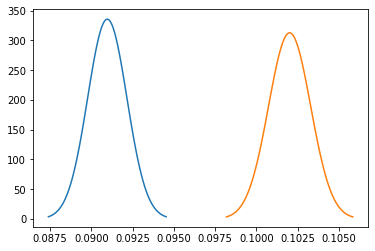

In [0]:
from scipy.stats import norm

# Compute the standard deviations
control_sd = cont_var**0.5
test_sd = test_var**0.5

# Create the range of x values 
control_line = np.linspace(cont_conv - 3 * control_sd, cont_conv + 3 * control_sd, 100)
test_line = np.linspace(test_conv - 3 * test_sd ,test_conv +  3 * test_sd, 100)

# Plot the distribution     
plt.plot(control_line, norm.pdf(control_line, cont_conv, control_sd))
plt.plot(test_line, norm.pdf(test_line, test_conv, test_sd))
plt.show()

####Plotting the difference distribution

- Calculate mean of the lift distribution by subtracting the control conversion rate (`cont_conv`) from the test conversion rate (`test_conv`)
- Generate the range of x-values for the difference distribution, making it 3 standard deviations wide.
- Plot a normal distribution by specifying the calculated `lift_mean` and `lift_sd`.
- Plot a green vertical line at the distributions mean, and a red vertical lines at each of the lower and upper confidence interval bounds. This has been done for you, so hit 'Submit Answer' to see the result!

In [0]:
cont_var = 1.411507925080655e-06
test_var = 1.6255542142857143e-06
cont_conv = 0.090965
test_conv = 0.102005

In [0]:
lwr_ci = 0.01103999822042502
upr_ci = 0.011040000177957487

The `cont_var` and `test_var` as well as the `cont_conv` and `test_conv` have been loaded for you. 

Additionally the upper and lower confidence interval bounds of this distribution have been provided as `lwr_ci` and `upr_ci` respectively.

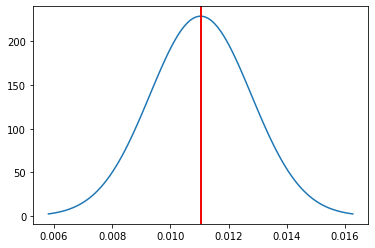

In [0]:
# Find the lift statistics
lift_mean = test_conv - cont_conv
lift_sd = (test_var + cont_var) ** 0.5

# Generate the range of x-values
lift_line = np.linspace(lift_mean - 3 * lift_sd, lift_mean + 3 * lift_sd, 100)

# Plot the distribution 
# plt.plot(lift_line, mlab.normpdf(lift_line, lift_mean, lift_sd))
plt.plot(lift_line, norm.pdf(lift_line, lift_mean, lift_sd))

# Add the annotation lines
plt.axvline(x = lift_mean, color = 'green')
plt.axvline(x = lwr_ci, color = 'red')
plt.axvline(x = upr_ci, color = 'red')
plt.show()